In [1]:
import matplotlib.pyplot as plt
from matplotlib import image

# Clustering : classification non supervisée 



### Contexte et objectif

Une tâche fréquente en analyse de données consiste, à partir d'un ensemble d'observations, à créer des groupes d'individus de telle sorte que les individus d'un groupe donné aient tendance à être similaires, et en même temps aient tendance à être différents des individus des autres groupes.  

Les algorithmes de <span style="color:GreenYellow">classification non supervisée répondent à cette tâche.</span>

Cette formation vise à étudier, implémenter et tester des algorithmes de classification non supervisée les plus populaires et les plus simples. L'objectif de cet exercice est d'introduire l'apprentissage non supervisé et son utilisation.

- Apprentissage non supervisé

L'apprentissage non supervisé est une classe de techniques d'apprentissage automatique qui utilise un ensemble de données non-étiquetées ou non-labellisées.
Il consiste à inférer des connaissances sur les données sur la seule base des échantillons d'apprentissage. Vu que les données cibles sont absentes lors de l'apprentissage, l'algorithme recherche les structures naturelles dans les données.

En *apprentissage non-supervisé* le modele cherche à trouver des partitions de modèles par lui-même. 

L'**extraction des données est donc descriptive**.

L'*apprentissage supervisé*, quant à lui, est utilisé quand l'utilisateur sait labelliser les informations. 

L'**extraction des données est alors prédictive**.

L'apprentissage non supervisé répond à différentes tâches :

  - Clustering (segmentation, regroupement)
  - Règles d'association
  - Réduction de dimensions

- Clustering

Le partitionnement de données (data clustering en anglais) est une des méthodes d'analyse des données. Elle vise à diviser un ensemble de données en différents groupes homogènes, en ce sens que les données de chaque sous-ensemble partagent des caractéristiques communes, qui correspondent le plus souvent à des critères de proximité (similarité) que l'on définit en introduisant des mesures et classes de distance entre objets.
L'objectif du clustering est de construire des classes automatiquement en fonction des instances (ou des observations) disponibles.

- Règles d'association

Dans le domaine du data mining, la recherche des règles d'association est une méthode populaire étudiée d'une manière approfondie dont le but est de découvrir des relations ayant un intérêt pour le statisticien entre deux ou plusieurs variables stockées dans de très importantes bases de données.
Cette approche consiste à analyser les relations entre les variables ou détecter des associations.

- Réduction de dimensions

La taille des données peut être mesurée selon deux dimensions : le nombre de variables et le nombre d'exemples.
Ces deux dimensions peuvent prendre des valeurs très élevées, ce qui peut poser un problème lors de l'exploration et l'analyse de ces données. Pour cela, il est fondamental de mettre en place des outils de traitement de données permettant une meilleure compréhension de la valeur des connaissances disponibles dans ces données.
La réduction des dimensions est l'une des plus vieilles approches permettant d'apporter des éléments de réponse à ce problème. Son objectif est de sélectionner ou d'extraire un sous-ensemble optimal de caractéristiques pertinentes pour un critère fixé auparavant. La sélection de ce sous-ensemble de caractéristiques permet d'éliminer les informations non-pertinentes et redondantes selon le critère utilisé. Cette sélection/extraction permet donc de réduire la dimension de l'espace des exemples et de rendre l'ensemble des données plus représentatif du problème.
En effet, les principaux objectifs de la réduction de dimension sont :

Faciliter la visualisation et la compréhension des données
Réduire l'espace de stockage nécessaire
Réduire le temps d'apprentissage et d'utilisation
Identifier les facteurs pertinents

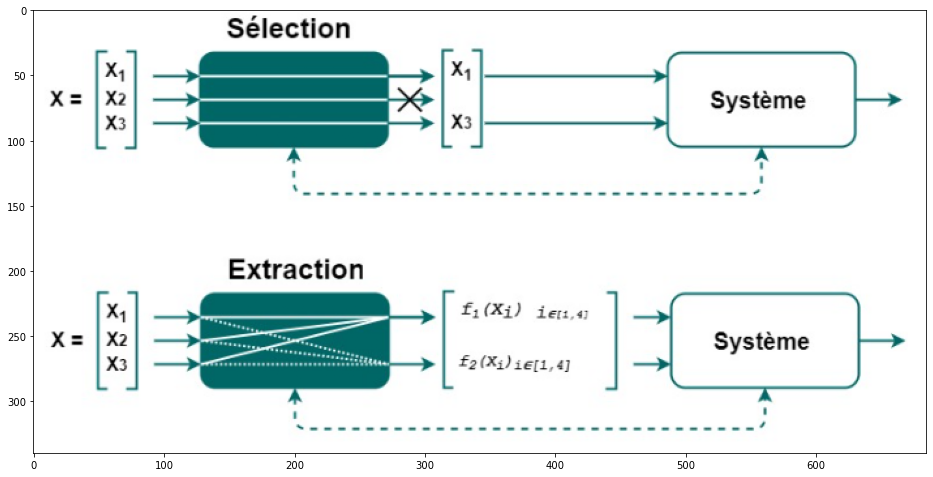

In [2]:
img = image.imread('clustering.png')
plt.figure(figsize=(16, 12))
plt.imshow(img)

## 1 - K-Means 
- Contexte et objectif

L'objet de cet exercice est d'étudier, d'implémenter et de tester l'algorithme k-means ; l'un des algorithmes de classiﬁcation. Une brève description de l'algorithme ainsi qu'un exemple jouet sont donnés ci-après.

L'exercice est composé de plusieurs questions, faites-les dans l'ordre et faites attention à respecter le nom des variables.

1. Préparation et modélisation des données 
Le jeu de données que nous allons utiliser dans cet exercice s'appelle Ruspini.
Cet ensemble de données est composé de 75 points répartis en quatre groupes, ce qui le rend idéal pour illustrer les techniques de clustering.

- (a) Importer la bibliothèque pandas sous le nom pd.
- (b) Importer la bibliothèque numpy sous le nom np.
- (c) Importer le package matplotlib.pyplot sous le nom plt.
- (d) Importer le sous-module KMeans du module sklearn.cluster.
- (e) Lire le fichier ruspini.csv dans un DataFrame appelé df.
- (f) Afficher les cinq premières lignes du data frame df.

In [3]:
# Importation des packages nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Lecture du fichier "ruspini.csv"
df = pd.read_csv("ruspini.csv", sep=';')

# Affichage des 5 premières lignes du dataset
df.head(5)

,x,y
0,4,53
1,5,63
2,10,59
3,9,77
4,13,49


Visualisation des données  

La visualisation des données est une excellente solution pour reconnaître des relations entre les attributs de l'ensemble de données.
Dans le cas d'une classification non supervisée simple, la visualisation des données permet par exemple d'identifier le nombre de clusters (i.e les groupes similaires).

Dans le cas des données ruspini, il suffit juste de tracer le nuage de points  (x,y)(x,y) .

- (g) Tracer le nuage des points ruspini et afficher le graphique.

(75, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       75 non-null     int64
 1   y       75 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


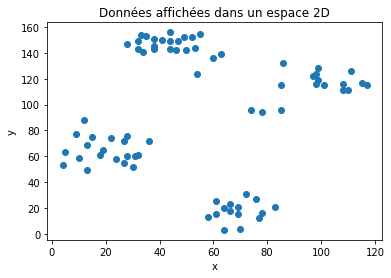

In [4]:
print(df.shape)
df.info()
# Visualisation des données 
plt.scatter(df['x'],df['y'])
plt.ylabel('y')
plt.xlabel('x')
plt.title('Données affichées dans un espace 2D')
plt.show()

Détection des valeurs aberrantes  

Le diagramme en boîte est un affichage graphique utile pour décrire le comportement des données au milieu ainsi qu'à la fin des distributions. Il utilise la médiane et les quartiles inférieurs et supérieurs.  

Les valeurs en dehors du diagramme en boîte sont considérées comme des données aberrantes. Une donnée aberrante est une valeur ou une observation qui est distante des autres observations effectuées, c'est-à-dire qu'elle contraste grandement avec les valeurs mesurées.

Le sous-module matplotlib.pyplot permet de tracer le diagramme en boîte pour une série de valeurs numériques. Il dispose de la fonction boxplot qui permet de tracer plusieurs diagrammes en boîte pour une liste de série numériques passée en paramètres.  

- (h) Tracer les diagrammes en boîte des deux variables explicatives : x et y.

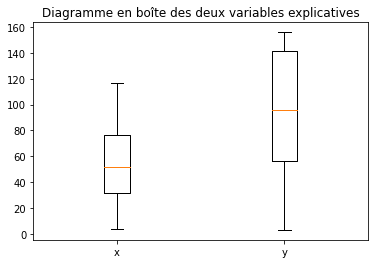

In [5]:
# Diagramme en boîte (boxplot) de toutes les variables explicatives
liste = [df['x'], df['y']]
plt.figure()
plt.title('Diagramme en boîte des deux variables explicatives')
plt.boxplot(liste, labels = ['x', 'y'])
plt.show()

## 2. Apprentissage des données  

K-Means : de la théorie à la pratique  

Le partitionnement en k-moyennes (ou k-means) est une méthode de clustering (regroupement de données) très utilisé en apprentissage non supervisé.
Étant donnés des points et un entier k, l'algorithme vise à diviser les points en k groupes, appelés clusters, homogènes et compacts.

L'algorithme est décrit par le pseudo-code suivant :

- alculer les distances avec les k-centroïdes pour chaque point du dataset
- Assigner chaque point au centroïde le plus proche
- Actualiser les centroïdes comme centre des nouveaux cluster obtenus
- Répéter les opérations précédentes jusqu'à ce que les centroïdes convergent

A la différence de l'algorithme des k-medoids, qui prend obligatoirement des points du dataset comme centroïdes, l'algorithme des k-means a des centroïdes, sélectionnés aléatoirement, qui ne sont généralement pas des points du dataset.  

La sélection aléatoire des points au début fait que l'algorithme n'est pas déterministe et l'output est généralement différent à chaque exécution.  

Le package sklearn.cluster implémente l'algorithme KMeans, la fonction KMeans initialise un classificateur permettant l'application de l'algorithme des k-moyennes.  

Il s'utilise de façon très simple :  

- clf = KMeans(n_clusters = K) : permet d'initialiser un classificateur clf qui utilise K centres et construit au final K clusters.
- clf.fit(data) : exécute l'algorithme des k-moyennes sur le jeu de données data, en utilisant K centres.  

À l'issue de son exécution, KMeans a associé chaque donnée à un groupe, les groupes sont numérotés de  00  à  (K−1)(K−1) .  

KMeans fournit une liste contenant les objets suivants :

- labels_ : un vecteur qui contient le numéro du groupe de chacune des données.
- clustercenters : une liste des positions des K centroïdes.


(a) Créer un classifieur, kmeans, utilisant 2 centres.  
(b) Entraîner l'algorithme sur l'ensemble d'entraînement df.  
(c) Calculer les positions des K centroïdes et les labels du data set df.  

In [6]:
# Algorithme de K-means
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df)

# Centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

Visualisation des clusters  

La visualisation des clusters permet de savoir la distribution des modèles et des attributs de l'ensemble de données.  

Par exemple, après avoir classé les différents clients d'une banque, la visualisation des clusters va permettre de mieux comprendre les caractéristiques de chaque groupe. Ce clustering va permettre au pôle marketing de la banque de définir une stratégie marketing pour chaque cluster.

Dans le cas des données ruspini, la cellule de code ci-dessous permet de tracer le nuage de points  (x,y)(x,y) .  

Chaque couple de points est attribué à son cluster correspondant. Les centroïdes correspondent aux points bleus de la figure.

(d) Exécuter la cellule de code ci-dessous.

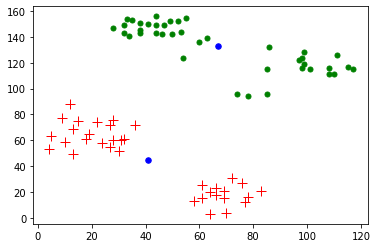

In [7]:
#Visualisation des clusters et des centroïdes 

# Liste des couleurs
colors = ["g.","r+"]  # = couleur r et marqueur . ( pour avoir un point )  ici c'est la fct° plot de numpy !!!! ceci pour gérer la couleur + la forme du point en meme temps

# Graphique du nuage de points attribués au cluster correspondant
for i in range(len(df)):
    plt.plot(df.iloc[i,0], df.iloc[i,1], colors[labels[i]], markersize = 10)  # pour éviter c= ou color = on utilise ici color[labels[i]], comme label = +1 ou - 1 faut 2 colors

# Graphique des centroïdes
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "o", color = "blue",s=30, linewidths = 1, zorder = 10)
plt.show()

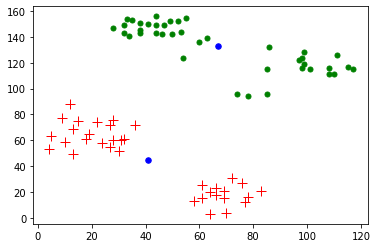

In [8]:
# Centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
# Graphique du nuage de points attribués au cluster correspondant
for i in range(len(df)):
    plt.plot(df.iloc[i,0], df.iloc[i,1], colors[labels[i]], markersize = 10)

# Graphique des centroïdes
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "o", color = "blue",s=30, linewidths = 1, zorder = 10)
plt.show()

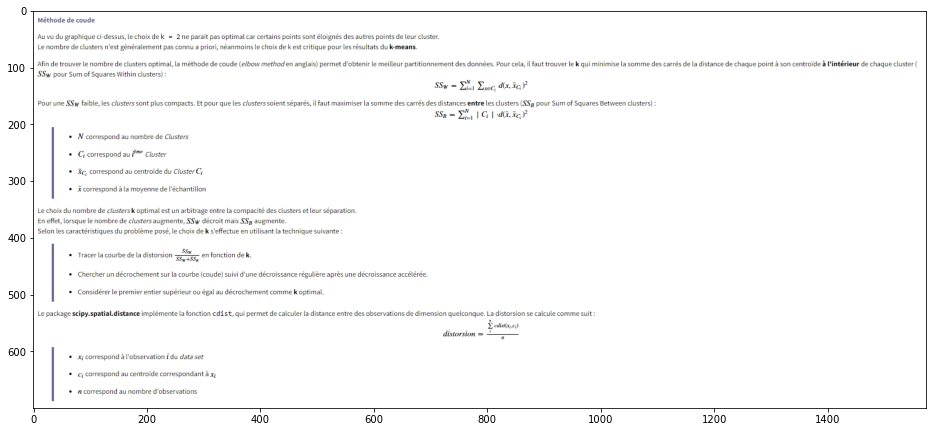

In [9]:
img = image.imread('clustering-methode_de_coude.png')
plt.figure(figsize=(16, 16))
plt.imshow(img)

- (e) Importer la fonction cdist du package scipy.spatial.distance.  
- (f) Pour chaque valeur de k  ∈{2,3,4,5,6}∈{2,3,4,5,6} , entraîner l'algorithme KMeans sur l'ensemble d'entraînement df.  
- (g) Calculer la distorsion pour chaque modèle construit.  

In [10]:
# Importation de la fonction cdist du package scipy.spatial.distance
from scipy.spatial.distance import cdist

# Liste des nombre de clusters
range_n_clusters = [2, 3, 4, 5, 6]  

# Initialisation de la liste de distorsions
distorsions = []

# Calcul des distorsions pour les différents modèles
for n_clusters in range_n_clusters:
    
    # Initialisation d'un cluster ayant un pour nombre de clusters n_clusters
    cluster = KMeans(n_clusters = n_clusters)
    
    # Apprentissage des données suivant le cluster construit ci-dessus
    cluster.fit(df)
    
    # Ajout de la nouvelle distorsion à la liste des données
    distorsions.append(sum(np.min(cdist(df, cluster.cluster_centers_, 'euclidean'), axis=1)) / np.size(df, axis = 0))

Après avoir calculé les distorsions, il est nécessaire de visualiser le graphique des distorsions en fonction du nombre de clusters pour pouvoir choisir le nombre k optimal.

- (h) Tracer le graphique des distorsions en fonction du nombre de clusters.

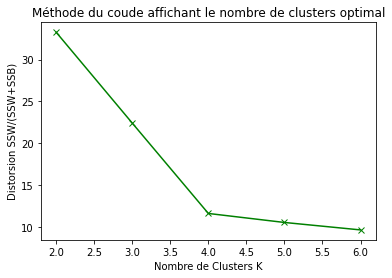

In [11]:
# Visualisation des distorsions en fonction du nombre de clusters
plt.plot(range_n_clusters, distorsions, 'gx-')
plt.xlabel('Nombre de Clusters K')
plt.ylabel('Distorsion SSW/(SSW+SSB)')
plt.title('Méthode du coude affichant le nombre de clusters optimal')
plt.show()

La courbe obtenue décroit fortement et change de trajectoire après k = 4. Ainsi, le nombre de clusters optimal est 4.

- (i) Réentraîner l'algorithme sur l'ensemble d'entraînement df en utilisant 4 classes de séparation.
- (j) Calculer les positions des K centroïdes et les labels du data set df.

In [12]:
# Algorithme de K-means
kmeans = KMeans(n_clusters = 4)
kmeans.fit(df)

# Centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

La cellule de code ci-dessous permet de tracer le nuage de points  (x,y)(x,y) .
Chaque couple de points est attribué à son cluster correspondant. Les centroïdes correspondent aux points bleus de la figure. Ce tracé affiche quatre groupes.

- (k) Exécuter la cellule de code ci-dessous.

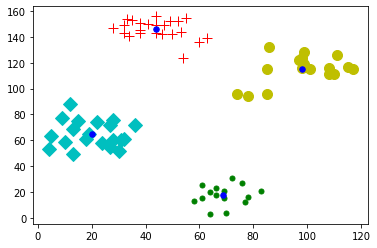

In [13]:
#Visualisation des clusters et des centroïdes 

# Liste des couleurs
colors = ["g.","r+","cD","yo"]

# Graphique du nuage de points attribués au cluster correspondant
for i in range(len(df)):
    plt.plot(df.iloc[i,0], df.iloc[i,1], colors[labels[i]], markersize = 10)

# Graphique des centroïdes
plt.scatter(centroids[:, 0],centroids[:, 1], marker = "o", color = "blue",s=30, linewidths = 1, zorder = 10)
plt.show()

En utilisant quatre classes de séparation, les groupes sont compacts et bien séparés.

La méthode des **K-Means** essaye en général de créer des clusters avec un rayon à peu près de même taille. Cependant, cette méthode n'est plus efficace quand les clusters se croisent.  

En effet, en appliquant l'algorithme kmeans avec 3 classes de séparation sur les données de la figure de gauche, les clusters obtenus (affichés sur la figure de droite) ne sont pas compacts et non plus séparés.  

Ainsi, **un regroupement qui minimise la distance intra-classe n'est pas toujours efficace**.

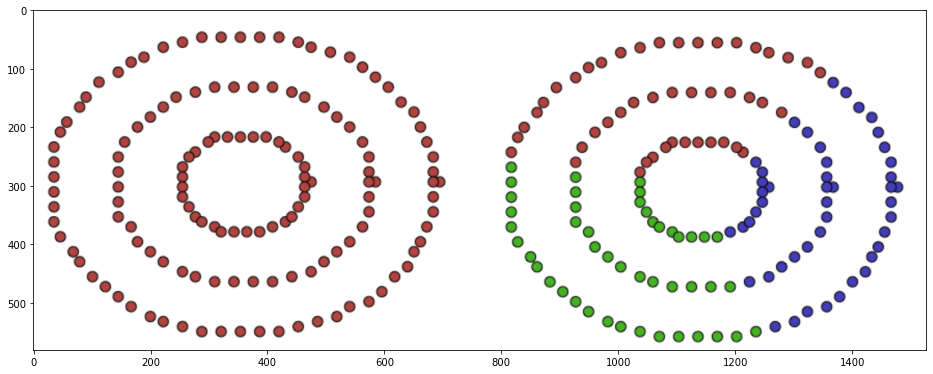

In [14]:
img = image.imread('clustering3.png')
plt.figure(figsize=(16, 16))
plt.imshow(img)

## 3 - Classification ascendante hiérarchique 
### Contexte et objectif

L'objectif de cet exercice est d'étudier, d'implémenter et de tester l'algorithme de classification ascendante hiérarchique (hierarchical clustering en anglais).

L'exercice est composé de plusieurs questions, faites-les dans l'ordre et faites attention à respecter le nom des variables.

1. Préparation et modélisation des données
Le jeu de données utilisé dans cet exercice est stocké dans le fichier fromage.txt.
Cet ensemble de données, contient 9 attributs numériques pour 29 variétés de fromages.
Les attributs de ce data set sont : calories, sodium, calcium, lipides, retinol, folates, proteines, cholesterol, magnesium.
Les indices de la base de données sont stockés dans la colonne Fromages.

L'objectif de cet exercice est d'identifier des rapprochements entre différentes catégories de fromages

- (a) Importer la bibliothèque pandas sous le nom pd.
- (b) Importer la bibliothèque numpy sous le nom np.
- (c) Importer le package matplotlib.pyplot sous le nom plt.
- (d) Importer le sous-module AgglomerativeClustering du module sklearn.cluster.
- (e) Lire le fichier fromage.txt dans un DataFrame appelé df en utilisant le séparateur '\t' et en fixant la première colonne comme index.
- (f) Afficher les cinq premières lignes du data frame df.

In [15]:
# Importation des packages nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

# Lecture du fichier "anim.txt"
df = pd.read_csv("fromages.csv", sep = ';', index_col=0)

# Affichage des 5 premières lignes du dataset
df.head(30)  # shape = (29, 9)

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20
Cantal,367,256.0,264.0,28.8,48.8,5.7,23.0,90,30
Chabichou,344,192.0,87.2,27.9,90.1,36.3,19.5,80,36
Chaource,292,276.0,132.9,25.4,116.4,32.5,17.8,70,25
Cheddar,406,172.0,182.3,32.5,76.4,4.9,26.0,110,28
Comte,399,92.0,220.5,32.4,55.9,1.3,29.2,120,51


Détection des valeurs aberrantes  

- (g) Tracer les boxplots (boîtes à moustaches) pour chacune des variables explicatives.

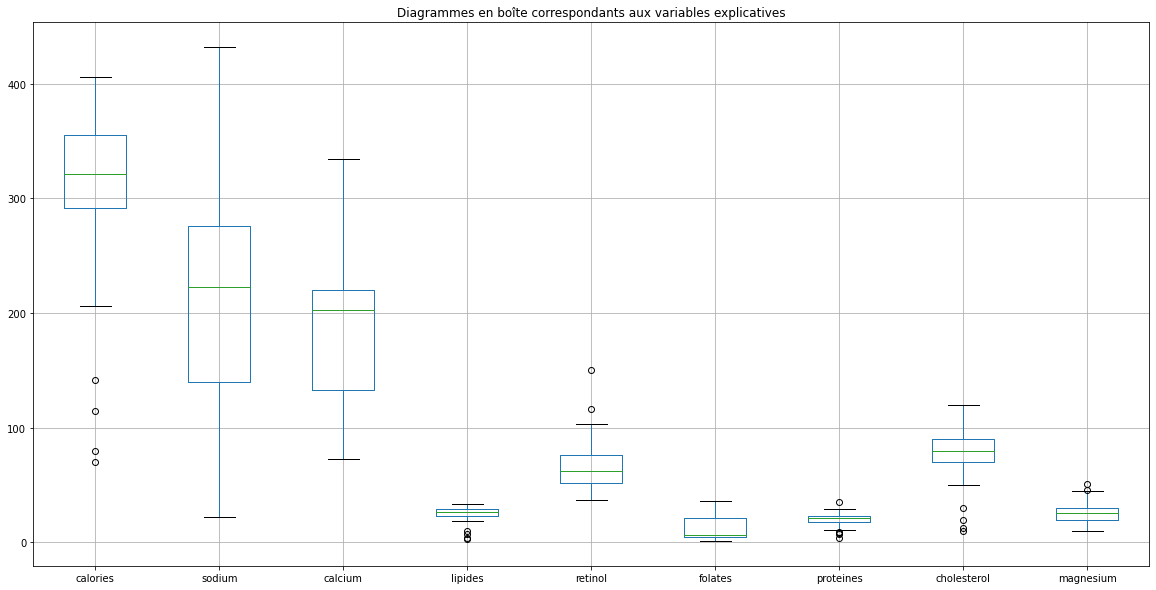

In [16]:
# Récupération des noms des colonnes 
ls_features = list(df.keys())

# Diagramme en boîte (boxplot) de toutes les variables explicatives
plt.figure(figsize=(20, 10))
plt.title('Diagrammes en boîte correspondants aux variables explicatives')
plt.boxplot(df.values, 0, 'rD', labels = ls_features)
# df.boxplot(column=list(df.columns))

plt.show()

Le diagramme ci-dessus illustre que la variance observée dépend beaucoup de la caractéristique observée.
On observe des valeurs extrêmes dans certains cas, notamment pour les calories, et le cholestérol.

2. Apprentissage des données
Classification ascendante hiérarchique
La classification ascendante hiérarchique (CAH) est une méthode de partitionnement des données d'apprentissage non supervisé.
À partir d'un ensemble de données représentées par n points, son but est de répartir ces points dans un certain nombre de classes (clusters) non défini au préalable.

La classification ascendante hiérarchique est dite ascendante (en anglais bottom-up) car elle part d'une situation où tous les individus forment chacun une classe, puis sont rassemblés en classes de plus en plus grandes.

L'algorithme suit la démarche récursive suivante :

S'il y a plus d'un cluster, calculer la distance entre tous les points du data set
Mettre chaque objet dans son propre cluster
Fusionner les deux clusters les plus "proches"
Calculer les distances entre le nouveau cluster et les autres
Répéter les deux dernières opérations jusqu'à obtenir un seul cluster

Comment est mesurée la distance ou l'éloignement entre deux clusters ?

Les principales métriques utilisées pour calculer la distance entre deux clusters sont :

La distance minimale (single linkage) : il s'agit de la plus petite distance mesurée entre deux points de clusters différents.
La distance maximale (complete linkage) : il s'agit de la plus grande distance mesurée entre deux points de clusters différents.
La distance moyenne (average linkage) : il s'agit de la moyenne des distances entre chaque point du premier cluster et chaque point du second.
Le qualificatif hiérarchique de cette classification vient du fait qu'elle produit une hiérarchie entre les clusters à toutes les étapes de l'algorithme : au sommet de la hiérarchie, tous les points sont regroupés et en bas de la hiérarchie, tous les points sont isolés.

Cette hiérarchisation s'observe parfaitement à l'aide de dendrogrammes.
Un dendrogramme, ou arbre hiérarchique, est un diagramme qui montre les différents clusters obtenus à chaque étape.
La première ligne représente les données et les nœuds représentent les regroupements auxquels les données appartiennent.

Un exemple de dendrogramme :

Une fois les différents clusters obtenus, il est possible de choisir le nombre de cluster optimal en coupant le dendrogramme au plus grand saut entre deux clusters consécutifs (cf image ci-dessous).
Le nombre optimal de clusters correspond alors au nombre de lignes verticales traversées par la coupe horizontale du dendrogramme.

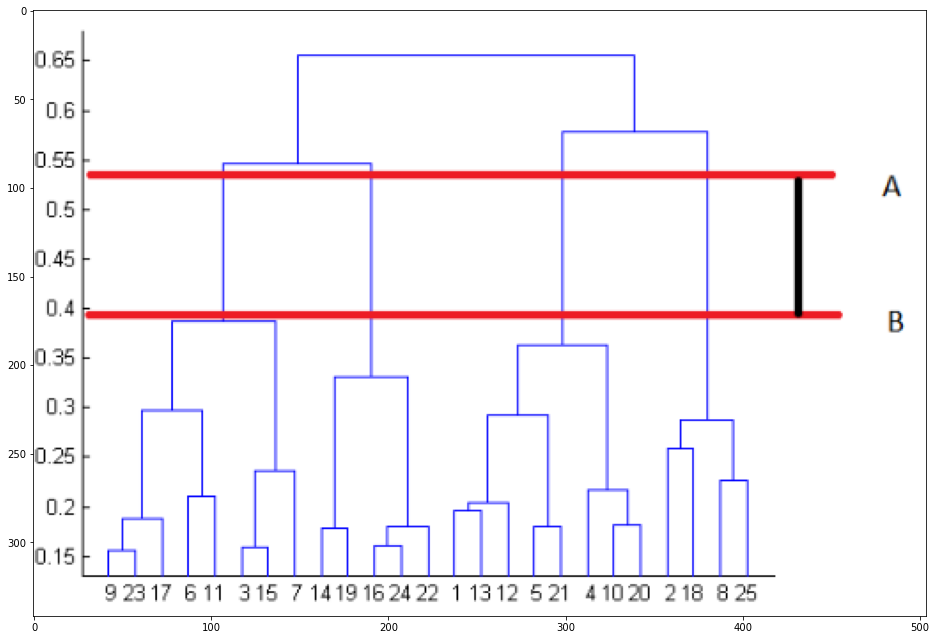

In [17]:
from matplotlib import image
img = image.imread('classif_ascendante_hierarchique.png')
plt.figure(figsize=(16, 16))
plt.imshow(img)


e package sklearn.cluster permet d'implémenter l'algorithme CAH.
La fonction AgglomerativeClustering permet d'initialiser un classifieur permettant d'appliquer cet algorithme :

clf = AgglomerativeClustering(n_clusters = K) # instanciation
clf.fit(data) # clustering
À l'issue de son exécution, CAH a associé chaque donnée à un groupe.
les groupes sont numérotés de 0 à (K-1) : AgglomerativeClustering fournit un vecteur qui contient le numéro du groupe de chacune des données, obtenu par l'argument labels_.

- (a) Créer un classifieur, AgglomerativeClustering, utilisant 4 centres.
- (b) Entraîner l'algorithme sur l'ensemble d'entraînement df.
- (c) Calculer les labels du data set df.  


**La classification en 4 groupes n'est pas un choix arbitraire**. Elle donne un groupe qui rassemble les fromages frais, les fromages à pâte molle, les fromages "durs" et une variété des autres fromages.

In [18]:
# Initialisation du classificateur CAH pour 4 clusters
cluster = AgglomerativeClustering(n_clusters = 4)

# Apprentissage des données 
cluster.fit(df[ls_features])

# Calcul des labels du data set
labels = cluster.labels_

### Dendrogramme

En python, il est possible de construire un dendrogramme de la manière suivante :

Effectuer un regroupement hiérarchique ou agglomératif des données (dataset) en utilisant la fonction linkage du sous-module scipy.cluster.hierarchy :
- Z = linkage(dataset, method = 'ward', metric = 'euclidean')  

Tracer le regroupement hiérarchique sous forme d'un dendrogramme, à l'aide de la fonction dendrogram du package comme suit :
- dendrogram(Z, labels = dataset.index, leaf_rotation = 90., color_threshold = 0)  

La méthode du ward linkage consiste à réunir les deux clusters dont le regroupement fera le moins baisser l'inertie interclasse. C'est la distance de Ward qui est utilisée : la distance entre deux classes est celle de leurs barycentres au carré, pondérée par les effectifs des deux clusters.  

La méthode dendrogram permet d'étiqueter les nœuds feuilles à l'aide de l'argument labels. Le  ièmeième  élément de ce vecteur précise l'étiquette de la  ièmeième  feuille.  

L'argument leaf_rotation indique l'orientation des labels. À 90 degrés les labels s'affichent de façon verticale. Le dendrogramme assigne une couleur unique à chaque groupe de nœuds dont la liaison est inférieure à la valeur réelle du color_threshold. 

Consulter la documentation pour plus de détails  

- (d) Tracer un dendrogramme à partir de df.

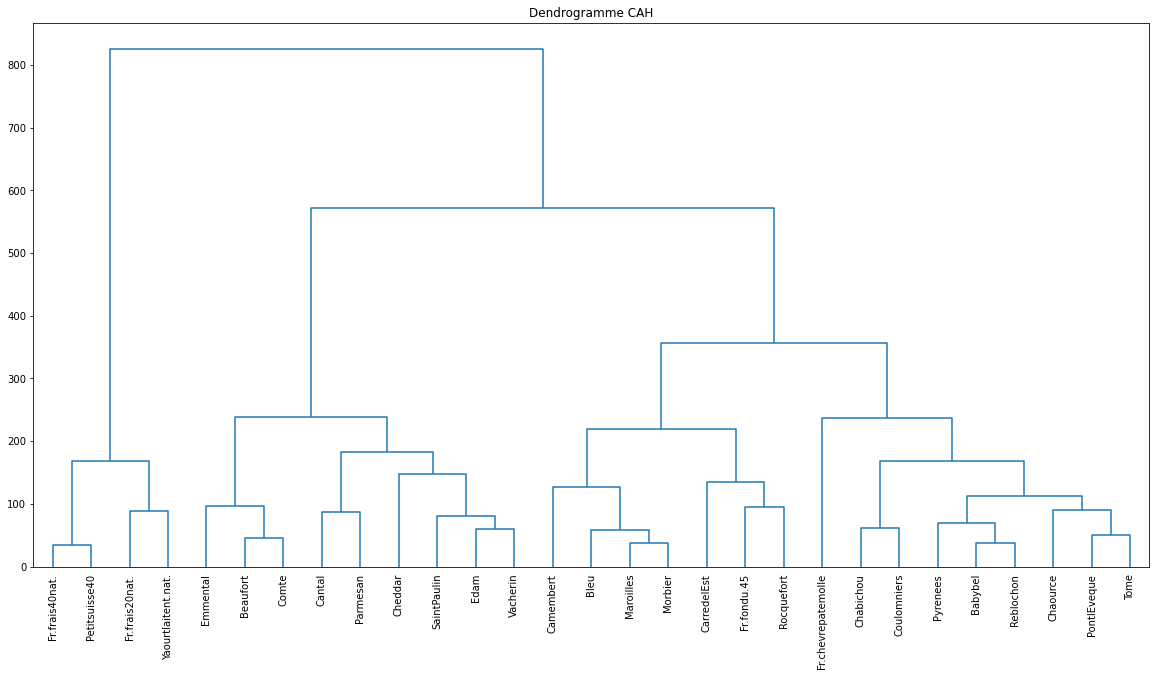

In [19]:
# Importation des packages nécessaires pour la CAH
from scipy.cluster.hierarchy import dendrogram, linkage

# Initialisaion de la figrue
plt.figure(figsize=(20, 10))

# Génération de la matrice des liens
Z = linkage(df, method = 'ward', metric = 'euclidean')

# Affichage du dendrogramme
plt.title("Dendrogramme CAH")
dendrogram(Z, labels = df.index, leaf_rotation = 90., color_threshold = 0)
plt.show()

Le dendrogramme suggère un découpage en 2 groupes.  

Les "fromages frais" (tout à gauche), se démarque fortement des autres.  

Il est possible d'ajouter des couleurs à notre dendrogramme en changeant la valeur du color_threshold.  

- (e) Exécuter la cellule suivante pour afficher le même dendrogramme que dans la question précédente, avec quatre couleurs.

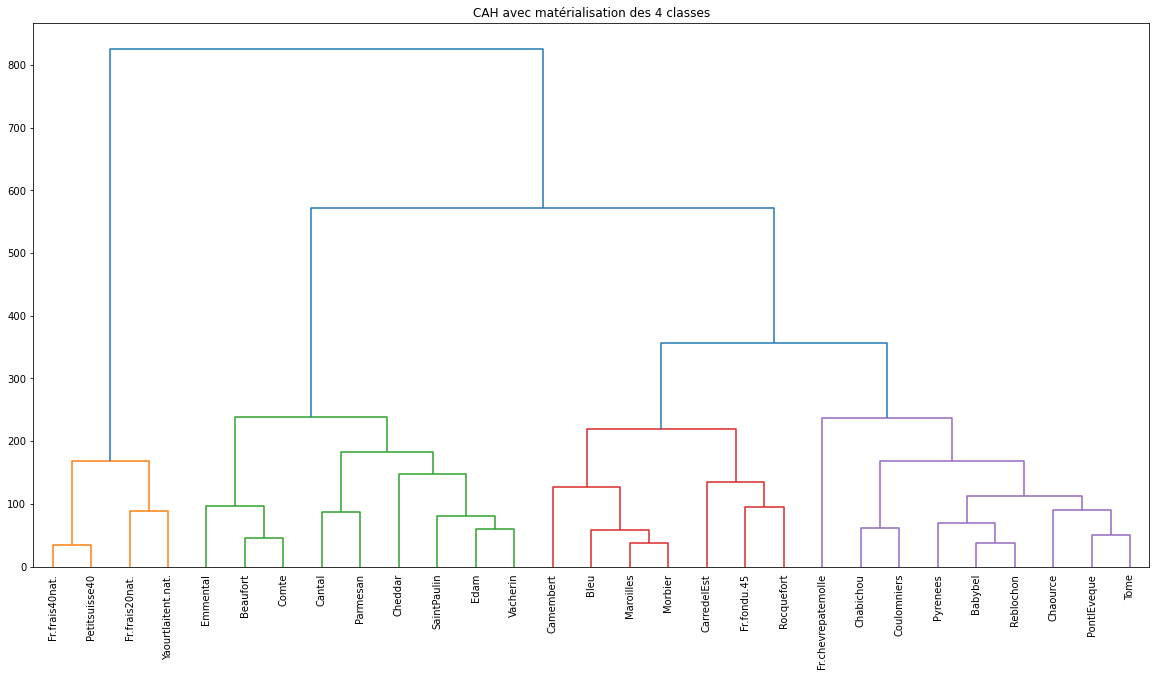

In [20]:
# Initialisation de la figure
plt.figure(figsize=(20, 10))

# Matérialisation des 4 classes (hauteur t = 290)
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z, labels = df.index, leaf_rotation = 90., color_threshold = 290)
plt.show()

### Evaluation du clustering

En apprentissage non supervisé, l'évaluation d'une méthode est une problématique délicate : la pertinence des groupes formés reste très dépendante du problème traité.  

En pratique, il existe des méthodes pour mesurer la qualité des résultats : une première approche consiste à utiliser des données artificielles pour lesquelles le regroupement attendu est connu.  

Ainsi, l'approche d'évaluation se base sur des critères numériques et consiste à mesurer l'inertie intra-cluster et/ou la séparation inter-clusters.  

À cet égard, le coefficient de silhouette permet de mesurer la qualité de l'apprentissage. Pour une observation ou une instance  i  de la base de données, le coefficient de silhouette est donné par la formule suivante :  

si = (bi−ai) / (max(ai,bi)  

- ai  correspond à la distance moyenne de l'observation  ii  aux autres observations du cluster.
- bi  correspond à la distance minimale de l'instance  ii  aux observations d'un autre cluster.  

Pour un cluster, le coefficient de silhouette est égal à la moyenne des coefficients des objets du cluster.  

Le partitionnement correspond à la moyenne des coefficients de tous les objets. Il est donc compris entre -1 et 1, et est d'autant plus proche de 1 que l'assignation de  i  à son cluster est satisfaisante.  

Le package sklearn.metrics implémente la fonction silhouette_score qui permet de mesurer ce coefficient.  

Elle prend en paramètres la liste des données non labéllisées, les labels calculés par le CAH et la métrique à utiliser pour calculer la distance entre les observations.

- (f) Importer la fonction silhouette_score du sous-module sklearn.metrics.
- (g) Calculer le coefficient de silhouette pour le partitionnement, en utilisant la métrique 'sqeuclidean'.

In [21]:
# Importation de la fonction silhouette_score du package sklearn.metrics
from sklearn.metrics import silhouette_score

# Calcul du coefficient de silhouette
silhouette_score(df, labels, metric='sqeuclidean')

0.4841389058187828

Pour pouvoir choisir le nombre de cluster optimal, il est possible d'entraîner l'algorithme CAH pour différentes valeurs de n_clusters et calculer le coefficient de silhouette pour chaque modèle entraîné.  

- (h) Entraîner l'algorithme CAH sur l'ensemble d'entraînement df en utilisant à chaque fois un n_clusters de la liste suivante : range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14].
- (i) Calculer le coefficient de silhouette pour chaque modèle entraîné.
- (j) Stocker les coefficients de silhouette calculés dans une liste appelée s_scores.

In [22]:
# Définition de la liste de n_clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

# Initialisation de la liste des coefficients de la silhouette score
s_scores = []

# Calcul du coefficient de silhouette pour les différentes valeurs de n_clusters
for n_clusters in range_n_clusters :
    
    # Initialisation du classificateur CAH pour n_clusters
    cluster = AgglomerativeClustering(n_clusters = n_clusters)

    # Apprentissage des données 
    cluster.fit(df[ls_features])

    # Calcul des labels du data set
    labels = cluster.labels_
    
    # Caclul du coefficient de silhouette
    s_score = silhouette_score(df, labels, metric='sqeuclidean')
    s_scores.append(s_score)

- (k) Tracer le graphique des coefficients de silhouette en fonction du nombre de clusters correspondants.

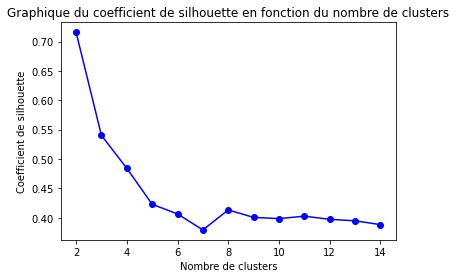

In [23]:
# Graphique du coefficient de silhouette en fonction du nombre de clusters
plt.plot(range_n_clusters, s_scores, 'bo-')
plt.title('Graphique du coefficient de silhouette en fonction du nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.show()

L'analyse du coefficient de silhouette permet de mesurer le résultat du clustering sur deux critères :

- l'homogénéité intra-cluster
- la séparation inter-clusters
- Le nombre de clusters qui satisfait le plus ces deux critères est 2, vu que le coefficient de silhouette de partitionnement pour n_cluters = 2 est le plus élevé.

Un autre critère important est le coefficient Calinski-Harabasz.  

Mathématiquement, ce coefficient est donné par la formule suivante :

- s = (SSb/SSw)×(N−k)/(k−1)

- k  correspond au nombre de clusters.
- N  correspond au nombre total d'observations (points de données).
- SSw  mesure la variance globale intra-clusters.
- SSb  mesure la variance globale entre les clusters.  

L'indice de Calinski-Harabasz devrait être le plus grand possible pour le nombre de clusters optimal.  

Le graphique suivant présente l'indice calinski_harabaz en fonction du nombre de clusters :

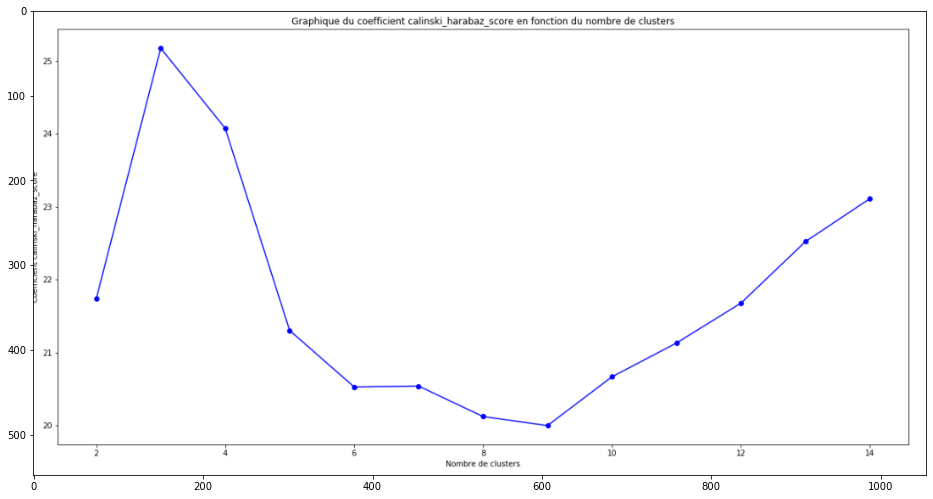

In [24]:
img = image.imread('coef calinsky score clustering.png')
plt.figure(figsize=(16, 16))
plt.imshow(img)

L'indice calinski_harabaz considère que le nombre de clusters qui satisfait le plus ces deux critères est 3.

En résumé, il est possible de dire si un regroupement donné a du sens, mais il est beaucoup plus problématique de quantifier son intérêt ou de dire si un regroupement est meilleur qu'un autre.  

Il est alors nécessaire d'avoir une bonne connaissance du jeu de données traité pour savoir quel sera le meilleur regroupement.

## 4 -Mean Shift 

### Contexte et objectif

Le but de cet exercice est d'étudier, d'implémenter et de tester l'algorithme de Mean shift en compression d'images.  

Cette technique consiste à transformer une image numérique A (suite de bits) en une deuxième B (suite de bits plus courte) pouvant restituer les mêmes informations, ou des informations voisines, en utilisant un algorithme de décompression.

L'exercice est composé de plusieurs questions, faites-les dans l'ordre et faites attention à respecter le nom des variables.

- 1. Préparation et modélisation des données

L'image utilisée dans cet exercice est stockée dans le fichier bird_small.png.

L'image est de taille (128 x 128).
L'image a une profondeur de 24 bpp (bits par pixel - nombre de bits utilisés pour représenter la couleur d'un pixel).  

- (a) Importer la bibliothèque numpy sous le nom np.
- (b) Importer le package matplotlib.pyplot sous le nom plt.
- (c) Importer les sous-modules MeanShift et estimate_bandwidth du module sklearn.cluster.
- (d) Lire l'image bird_small.png dans un array appelé img.

La fonction imread() de matplotlib.pyplot permet lire une image dans un array.

In [45]:
# Importation des packages nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

# Lecture de l'image bird_small.png
img = plt.imread("bird_small.png")

- (e) Calculer et afficher les dimensions de l'image img.
- (f) Afficher l'image bird_small.png stockée dans la variable img.

dimensions de l'image bird_small.png :  (197, 196, 4)


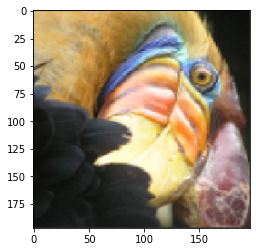

In [46]:
# Calcul et affichage des dimensions de l'image img
dimensions = img.shape
print("dimensions de l'image bird_small.png : ", dimensions)

# Affichage de l'image bird_small.png
plt.figure()
plt.imshow(img)
plt.show()

- (g) Redimensionner l'image img en une matrice de dimensions (16384 x 3).  

Numpy propose le redimensionnement d'un tableau avec la fonction reshape. Il faut tout de même que le nombre d'éléments reste le même entre les deux tableaux.

In [47]:
# Redimensionnement des données
X = img.reshape(img.shape[0]*img.shape[1], img.shape[2])

### Compression des images  

Dans une image colorée, chaque pixel est représenté par trois entiers non signés de 8 bits (allant de 0 à 255) qui spécifient les valeurs d'intensité rouge, verte et bleue : c'est ce qu'on appelle le codage RGB.
En pratique, nous ne pouvons visualiser que quelques couleurs dans une image. L'image ci-dessus est une image de 128 x 128 pixels au format PNG. L'objectif est de la compresser davantage en utilisant la quantification des couleurs. Autrement dit, l'image contient des milliers de couleurs et l'objectif est de restreindre l'image à k couleurs.

À cet égard, le clustering Mean Shift regroupe des couleurs similaires dans des groupes de k.
Par conséquent, le centroïde de chaque groupe est représentatif des vecteurs de couleurs tridimensionnels (RGB). Ces centroïdes k remplaceront tous les vecteurs de couleurs dans leurs groupes, gardant ainsi seulement k combinaisons de couleurs pour l'ensemble de l'image.
Pour décompresser l'image, chaque pixel a pour vecteur de couleurs celui du centroïde le plus proche.

### Algorithme de Mean Shift    

La première étape de l'application de tous les algorithmes de clustering, notamment le Mean Shift, consiste à représenter les données mathématiquement.
Pour le Mean Shift, les données sont représentées sous forme de nuage de points.  

L'algorithme Mean Shift consiste à regrouper les pixels adjacents qui présentent des caractéristiques spectrales similaires dans des segments.  

La technique utilise une fenêtre, caractérisée par une bande passante en mouvement qui calcule une valeur moyenne de pixel pour déterminer quels pixels doivent être inclus dans chaque segment de l'image. Au fur et à mesure que la fenêtre se déplace sur l'image, elle recalcule la valeur de manière itérative pour s'assurer que chaque segment est adapté.  

Il en résulte un regroupement de pixels d'images sous la forme d'un segment caractérisé par une couleur moyenne :

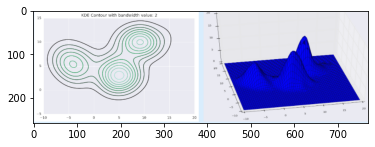

In [48]:
img = plt.imread("cluster_mean_shift 1.png")
plt.figure()
plt.imshow(img)
plt.show()

Les caractéristiques des segments d'images dépendent de la bande passante de la fenêtre.   

En diminuant la bande passante, le nombre de segments augmente. Ainsi, plus la bande passante est petite, plus le nombre de clusters est important.

Les deux graphiques ci-dessous illustrent l'algorithme de Mean Shift pour des bandes passantes différentes :

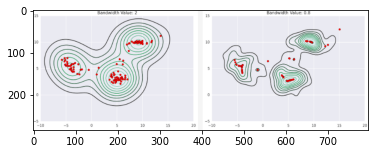

In [49]:
img = plt.imread("cluster_mean_shift 2.png")
plt.figure()
plt.imshow(img)
plt.show()

Le package sklearn.cluster implémente l'algorithme Mean Shift, la fonction MeanShift permet d'initialiser un classificateur permettant l'application de l'algorithme Mean Shift.  
Il s'utilise de façon très simple :

- bandwidth = estimate_bandwidth(X, quantile = quantile, n_samples = n_samples) :  
  initialisation d'une bande passante bandwidth en prenant en paramètres le jeu de données X, 
  le quantile quantile et le nombre d'échantillons à utiliser n_samples. Le quantile est une valeur numérique qui divise le jeu de données X en intervalles contenant le même nombre de données.  
  
- cluster = MeanShift(bandwidth = bandwidth) : intialisation de l'objet cluster.
- cluster.fit(X) : exécution de l'algorithme des Mean Shift sur le jeu de données X.  

À l'issue de son exécution, Mean Shift a associé chaque donnée à un groupe (les groupes sont numérotés de 0 à (K-1)).  

MeanShift fournit une liste contenant les objets suivants :

- labels_ : un vecteur qui contient le numéro du groupe de chacune des données.
- cluster_centers_ : une liste des positions des K centroïdes.  

- (a) Créer la fonction get_clusters_centroids qui a pour paramètres : le jeu de données X, le quantile quantile et le nombre d'échantillons à utiliser n_samples.  
Cette fonction entraîne l'algorithme de Mean Shift et renvoie les labels et les positions des centroïdes.

In [50]:
# Définition de get_clusters_centroids(X, quantile, n_samples)
def get_clusters_centroids(X, quantile, n_samples) :
    
    # Bande passante
    bandwidth = estimate_bandwidth(X, quantile = quantile, n_samples = n_samples)
    
    # Initilisation de l'objet Cluster
    cluster = MeanShift(bandwidth = bandwidth)
    
    # Apprentissage des données
    cluster.fit(X)
    
    return cluster.cluster_centers_, cluster.labels_ 

Le principe de la compression des images consiste à trouver le centroïde le plus proche à chaque pixel. Cela correspond aux labels que renvoit la fonction get_clusters_centroids  

Nous allons ici implémenter nous même une fonction permettant de calculer les indices du centroïde le plus proche de chaque observation de X.

- (b) Compléter la fonction findClosestCentroids qui a pour paramètres : le jeu de données X et les positions des centroïdes centroids.  
  Cette fonction renvoie les indices du centroïde le plus proche de chaque observation de X. (L'exécution de cette fonction peut prendre quelques minutes)

In [51]:
# Définition de la fonction findClosestCentroids

def findClosestCentroids(X, centroids) :
    
    idx = []                                     # Initialisation du vecteur des indices
    
    
    K = centroids.shape[0]                                         # Calcul du nombre de clusters
    
    for i in range(0, np.size(X, axis=0)) :      # Parcourir tous les pixels de l'image
        
        norm_val = []                            # Initialisation du vecteur des distances du pixel i aux centroïdes 
        
        for j in range(0, K) :                   # Parcourir tous les centroïdes
            
            a = ((X[i] - centroids[j])**2).sum() 
            norm_val.append(a)                   # Stockage de la distance du pixel i au centroïde j
           
        
        I = norm_val.index(min(norm_val))        # Récupérer les indices du centroïde le plus proche au pixel i
        
        idx.append(I)                            # Ajout de des indices à la liste idx 
        
    return idx

Pour pouvoir compresser l'image, il faut calculer les positions des centroïdes, regrouper les pixels et affecter chaque pixel au centroïde le plus proche.  

Les deux fonctions ci-dessus répondent à ces besoins.

la dernière étape de compression consiste à remplacer les vecteurs de couleurs de chaque pixels par ceux des centroïdes les plus proches

- (c) Affecter aux variables centroids et labels, les labels et les positions des centroïdes pour un quantile égal à 0.1 et un nombre d'échantillons égal à 300.
- (d) Calculer les indices du centroïde le plus proche à chaque élément de X.
- (e) Compresser l'image en remplaçant tous les vecteurs de couleurs par ceux des centroïdes les plus proches.
   La cellule de code ci-dessous a un temps d'exécution important, estimé à 3 minutes, vu la complexité de l'algorithme.

In [ ]:
# Calcul des labels et des positions des centroïdes 
centroids, labels = get_clusters_centroids(X, 0.1, 300)

# Calcul des indices du centroïde le plus proche à chaque élément de X
idx = findClosestCentroids(X, centroids)

# compression de l'image 
X_recovered = centroids[idx]

Pour pouvoir visualiser l'image construite, il faut redimensionner l'image compressée aux dimensions de l'image originale.

- (f) Redimensionner la matrice X aux dimensions initiales de l'image img.
- (g) Afficher l'image originale et l'image reconstruite.

In [ ]:
# Redimensionnement de la matrice X
X_recovered = X_recovered.reshape(img.shape[0], img.shape[1], img.shape[2])

# Affichage de l'image originale et celle reconstruite
plt.figure()
plt.subplot(121)
plt.imshow(img)
plt.title('Image originale')
plt.subplot(122)
plt.imshow(X_recovered)
plt.title('Image reconstruite')
plt.show()

### Ratio de compression, évaluation de l'algorithme
Le taux de compression est une mesure de la performance d'un algorithme de compression de données informatiques. Il est défini comme le rapport de la taille des données après compression sur la taille initiale des données :

- ⊤=Taille de l'image reconstruiteTaille de l'image originale
 
La cellule de code ci-dessous implémente un script pour calculer le taux de compression de l'image 'bird_small.png'.

- (h) Exécuter la cellule de code ci-dessous pour calculer le taux de compression.

In [ ]:
# Importation des packages nécessaires
import imageio
import os

# Enregistrement de l'image reconstruite
imageio.imwrite('bird_small_recovered.png', X_recovered)

# Taille en octets de l'image originale
original_size = os.stat('bird_small.png').st_size

# Taille en octets de l'image reconstruite
recovered_size = os.stat('bird_small_recovered.png').st_size

# Caclul et affichage du ratio de compression
compression_rate = round(recovered_size/original_size*100,2)
print('Ratio de compression : ', compression_rate, '%')

### Amélioration de la qualité de compression
- La compression d'image peut être effectuée avec perte de données ou sans perte.
- La compression sans perte est souvent préférée là où la netteté des traits est primordiale.  

Dans le cas de l'algorithme Mean Shift, il suffit de diminuer la valeur du quantile pour pouvoir conserver la netteté de l'image.

- (i) Refaire la compression de l'image 'bird_small.png' en améliorant la qualité de compression.

In [ ]:
# Calcul des labels et des positions des centroïdes en utilisant quantile = 0.01
centroids2, labels2 = get_clusters_centroids(X, 0.01, 300)

# Calcul des indices du centroïde le plus proche à chaque élément de X
idx = findClosestCentroids(X, centroids2)

# compression de l'image 
X2_recovered = centroids2[idx]

# Redimensionnement de la matrice X
X2_recovered = X2_recovered.reshape(img.shape[0], img.shape[1], img.shape[2])

# Affichage de l'image originale et celle reconstruite
plt.figure(figsize = (8, 16))
plt.subplot(121)
plt.imshow(img)
plt.title('Image originale')
plt.subplot(122)
plt.imshow(X2_recovered)
plt.title('Image Reconstruite')
plt.show()

- (j) Calculer le nouveau taux de compression.

In [ ]:
# Enregistrement de l'image reconstruite
imageio.imwrite('bird_small_recovered_2.png', X2_recovered)

# Taille en octects de l'image reconstruite
recovered_2_size = os.stat('bird_small_recovered_2.png').st_size

# Caclul et affichage du ratio de compression
compression_rate_2 = round(recovered_2_size/original_size*100,2)
print('Ratio de compression : ', compression_rate_2, '%')

L'algorithme Mean shift se base sur une approche simpliste. Il exploite intelligemment la densité des points afin de générer un nombre raisonnable de clusters.  

La valeur de la bande passante est souvent choisie en fonction de certaines connaissances spécifiques du jeu de données.  

Par exemple, dans l'exemple de compression d'image ci-dessus, la valeur de la bande passante peut être considérée comme la distance qui sépare les pixels dans l'espace des couleurs RGB les uns aux autres.

Cet algorithme est de complexité quadratique. Pour les jeux de données massives, l'exécution peut donc prendre beaucoup de temps.

